In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
%matplotlib inline


In [14]:
df = pd.read_csv('https://goo.gl/sp8gYx')
df.head()


,Run,Event,type1,Q1,pt1,eta1,phi1,E1,px1,py1,...,type2,Q2,pt2,eta2,phi2,E2,px2,py2,pz2,M
0,166699,835716681,G,1,4.2116,2.2366,-0.4849,19.9382,3.7261,-1.9631,...,T,-1,1.2556,2.2683,-1.4488,6.1319,0.1528,-1.2463,6.0011,2.1330
1,166699,836133459,G,-1,2.1479,-2.0159,-2.7753,8.2066,-2.0055,-0.7692,...,G,1,19.5453,-1.0826,-0.3408,32.1613,18.4210,-6.5332,-25.5406,13.6786
2,166699,836165498,G,1,21.0732,1.5948,-1.1137,54.0560,9.2997,-18.9102,...,T,-1,2.3864,1.5352,-1.7388,5.7968,-0.3991,-2.3528,5.2818,4.3813
3,166699,836249706,G,1,18.5889,1.6422,1.1923,49.8180,6.8688,17.2734,...,G,-1,1.8721,1.9704,1.6393,6.8459,-0.1281,1.8678,6.5841,3.2587
4,166699,835608783,G,-1,11.8194,0.8711,-1.5811,16.5947,-0.1214,-11.8187,...,T,1,0.9408,2.0107,-1.6559,3.5779,-0.0799,-0.9374,3.4504,4.0171


In [15]:
df['MassInvariant'] = ( (df.E1+df.E2)**2 - ( (df.px1+df.px2)**2 + (df.py1+df.py2)**2 + (df.pz1+df.pz2)**2) ) **.5
df.head()

,Run,Event,type1,Q1,pt1,eta1,phi1,E1,px1,py1,...,Q2,pt2,eta2,phi2,E2,px2,py2,pz2,M,MassInvariant
0,166699,835716681,G,1,4.2116,2.2366,-0.4849,19.9382,3.7261,-1.9631,...,-1,1.2556,2.2683,-1.4488,6.1319,0.1528,-1.2463,6.0011,2.1330,2.145853
1,166699,836133459,G,-1,2.1479,-2.0159,-2.7753,8.2066,-2.0055,-0.7692,...,1,19.5453,-1.0826,-0.3408,32.1613,18.4210,-6.5332,-25.5406,13.6786,13.680958
2,166699,836165498,G,1,21.0732,1.5948,-1.1137,54.0560,9.2997,-18.9102,...,-1,2.3864,1.5352,-1.7388,5.7968,-0.3991,-2.3528,5.2818,4.3813,4.395351
3,166699,836249706,G,1,18.5889,1.6422,1.1923,49.8180,6.8688,17.2734,...,-1,1.8721,1.9704,1.6393,6.8459,-0.1281,1.8678,6.5841,3.2587,3.273007
4,166699,835608783,G,-1,11.8194,0.8711,-1.5811,16.5947,-0.1214,-11.8187,...,1,0.9408,2.0107,-1.6559,3.5779,-0.0799,-0.9374,3.4504,4.0171,4.026974


In [16]:
len(df)

83761

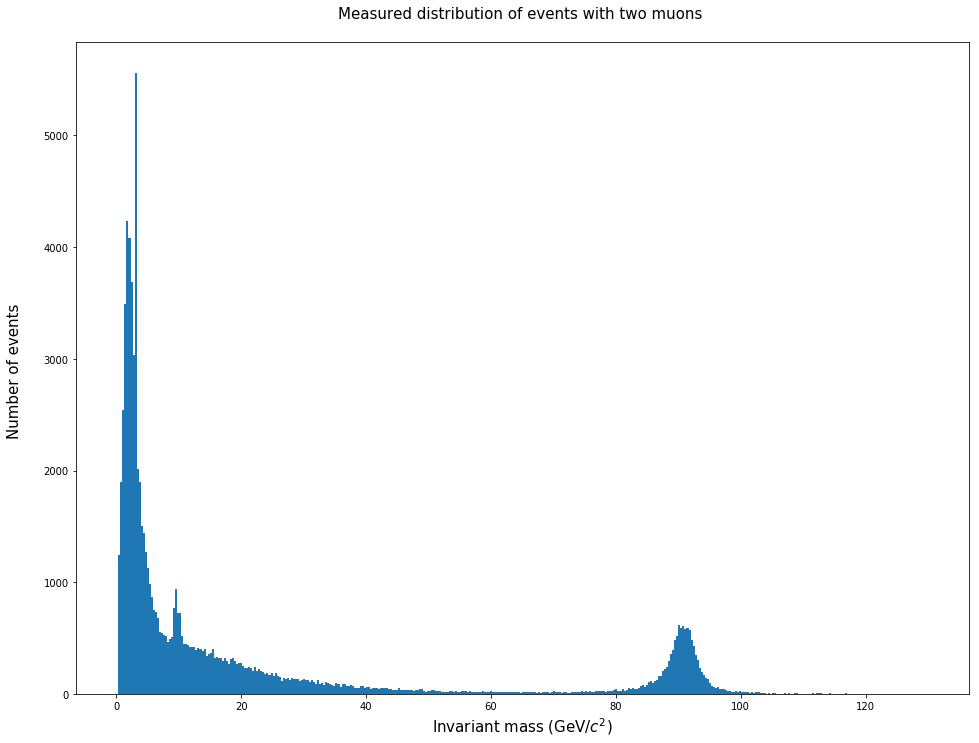

In [17]:
fig = plt.figure(figsize=(16, 12))

plt.hist(df.MassInvariant, 400, range = (0,130))

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)

plt.show()

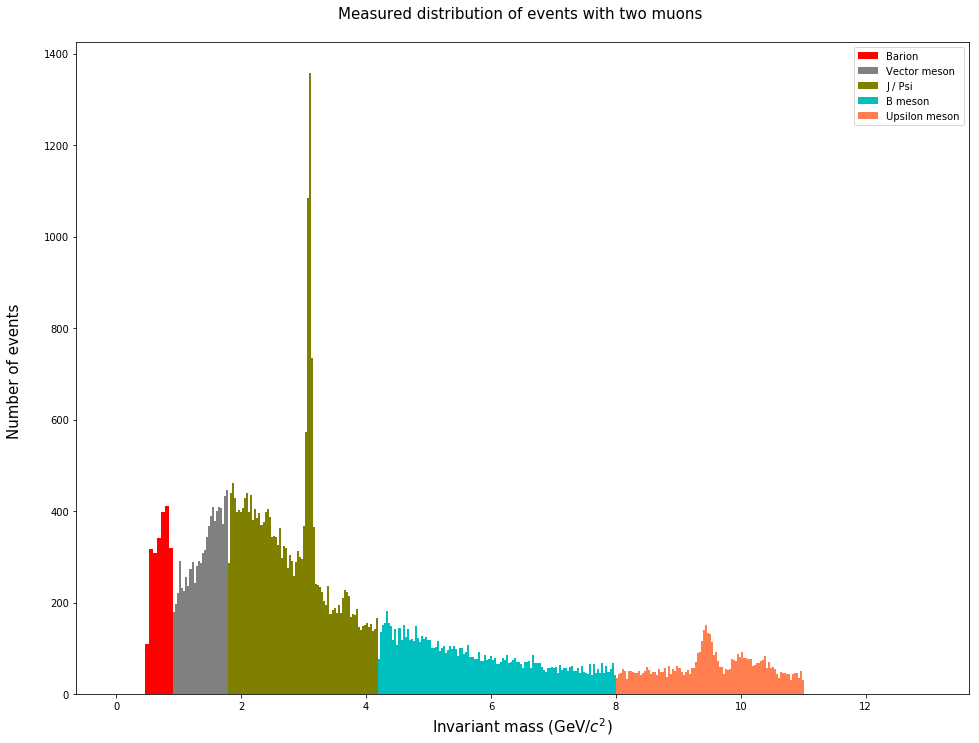

In [18]:
Barion = df[(df.MassInvariant >= 0.5) & (df.MassInvariant <= 0.9)]
Vmeson = df[(df.MassInvariant >= 0.91) & (df.MassInvariant<= 1.79)]
Jpsi = df[(df.MassInvariant >= 1.8) & (df.MassInvariant <= 4.2)]
Bmeson = df[(df.MassInvariant >= 4.21) & (df.MassInvariant <= 8)]
Upsilonmeson = df[(df.MassInvariant >= 8.01) & (df.MassInvariant <= 11)]

fig = plt.figure(figsize=(16, 12))

plt.hist(Barion .MassInvariant, 200, range = (0,13), label = 'Barion',  color = 'red')
plt.hist(Vmeson .MassInvariant, 400, range = (0,13), label = 'Vector meson', color = 'gray')
plt.hist(Jpsi .MassInvariant, 400, range = (0,13), label = 'J / Psi', color = 'olive')
plt.hist(Bmeson .MassInvariant, 400, range = (0,13), label = 'B meson', color = 'c')
plt.hist(Upsilonmeson .MassInvariant, 400, range = (0,13), label = 'Upsilon meson', color = 'coral')

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)
plt.legend()
plt.show()

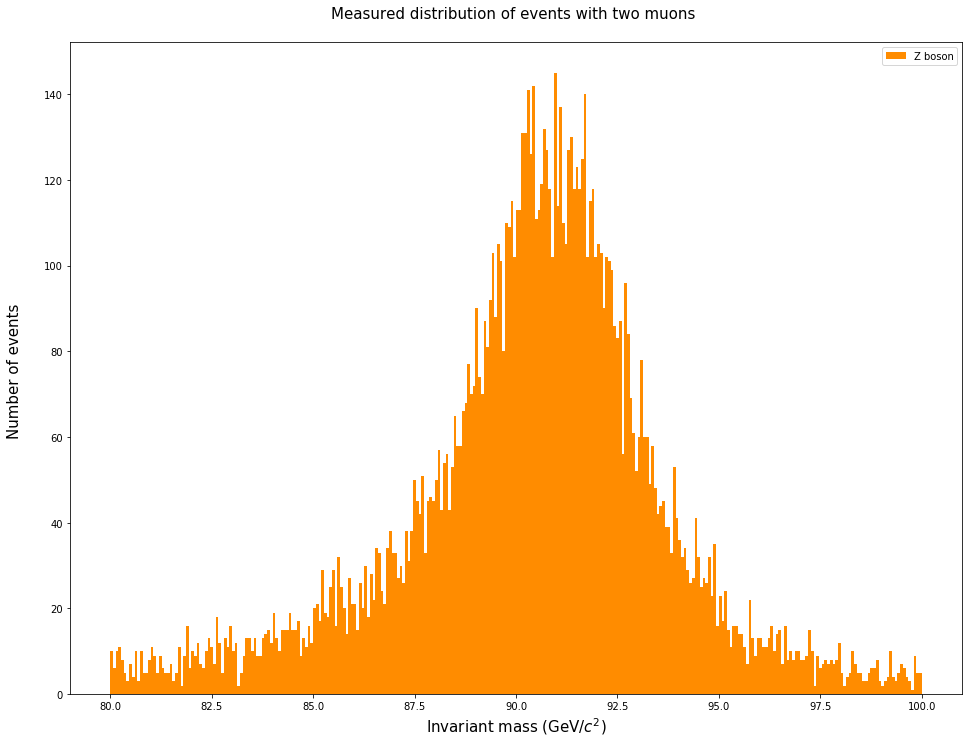

In [19]:
Z = df[(df.MassInvariant >= 80) & (df.MassInvariant <= 100)] 

fig = plt.figure(figsize=(16, 12))

plt.hist(Z .MassInvariant, 300, range = (80,100), label = 'Z boson',  color = 'darkorange')

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)
plt.legend()
plt.show()

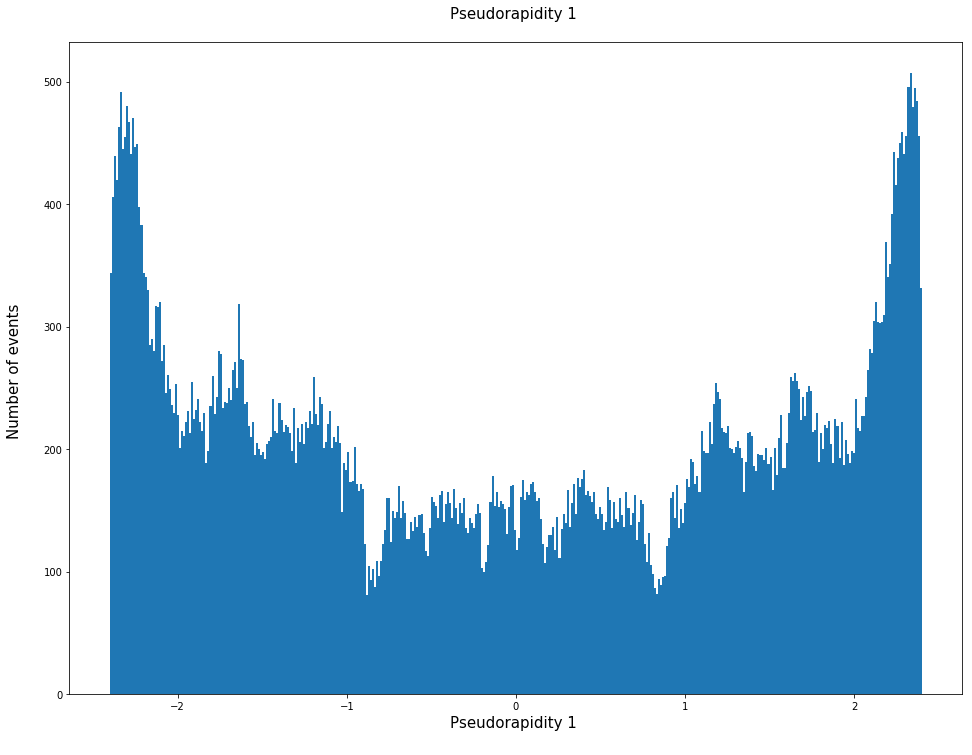

In [20]:
fig = plt.figure(figsize=(16, 12))

plt.hist(df.eta1, 400)

plt.xlabel('Pseudorapidity 1 \n', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Pseudorapidity 1 \n', fontsize = 15)

plt.show()

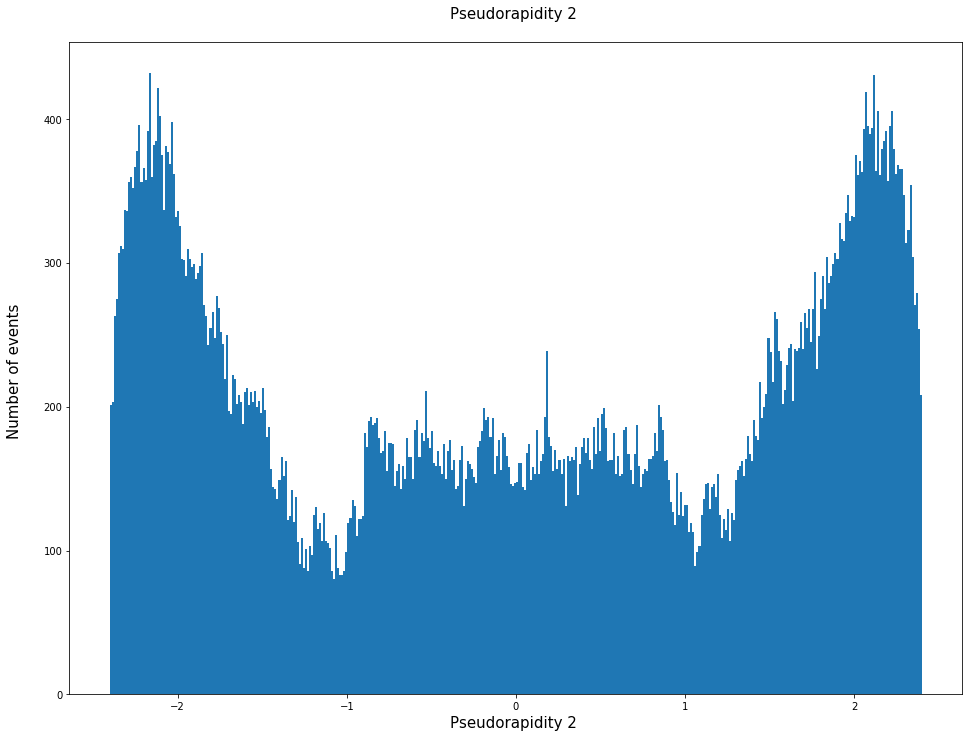

In [21]:
fig = plt.figure(figsize=(16, 12))

plt.hist(df.eta2, 400)

plt.xlabel('Pseudorapidity 2 \n', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Pseudorapidity 2 \n', fontsize = 15)

plt.show()

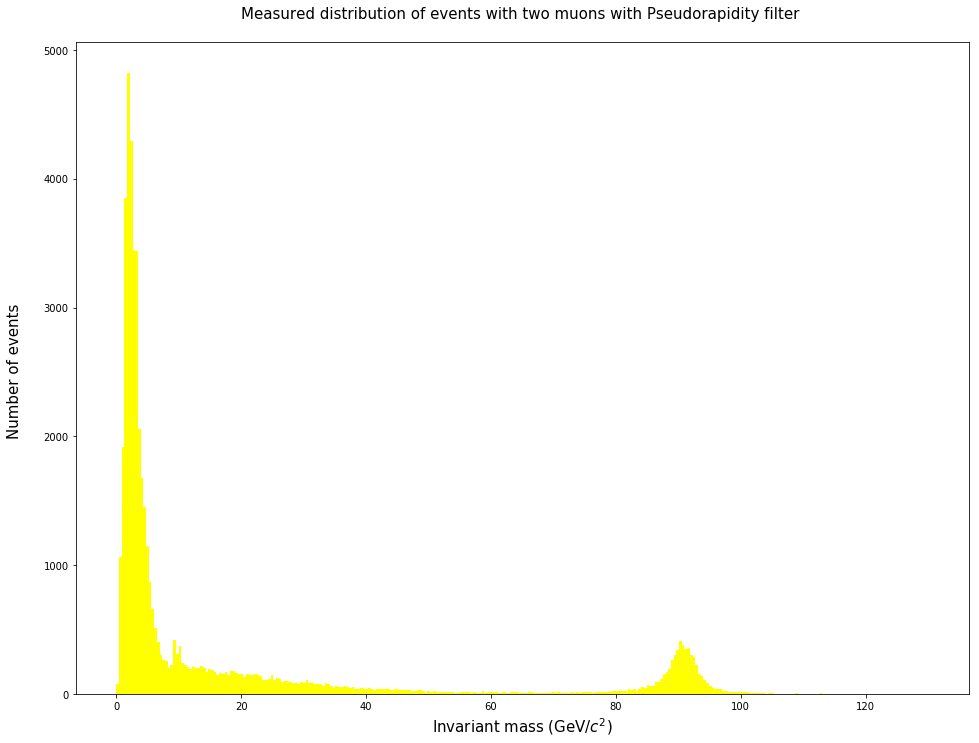

In [22]:
C1=(df.eta1 >= 1.1) & (df.eta1 <= 2.4)
C2=(df.eta1 >= -2.4) & (df.eta1 <= -1)
C3=(df.eta2 >= 1.4) & (df.eta2 <= 2.4)
C4=(df.eta2 >= -2.4) & (df.eta2 <= -1.3)
C5=(df.type1 == 'G')
C6=(df.type2 == 'G')
C7=(df.eta2 >= -.8) & (df.eta2 <= .8)
GO = df[(C1 | C2) & (C3 | C4 | C7 )]

fig = plt.figure(figsize=(16, 12))

plt.hist(GO .MassInvariant, 300, range = (0,130), color = 'yellow')

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons with Pseudorapidity filter \n', fontsize = 15)

plt.show()

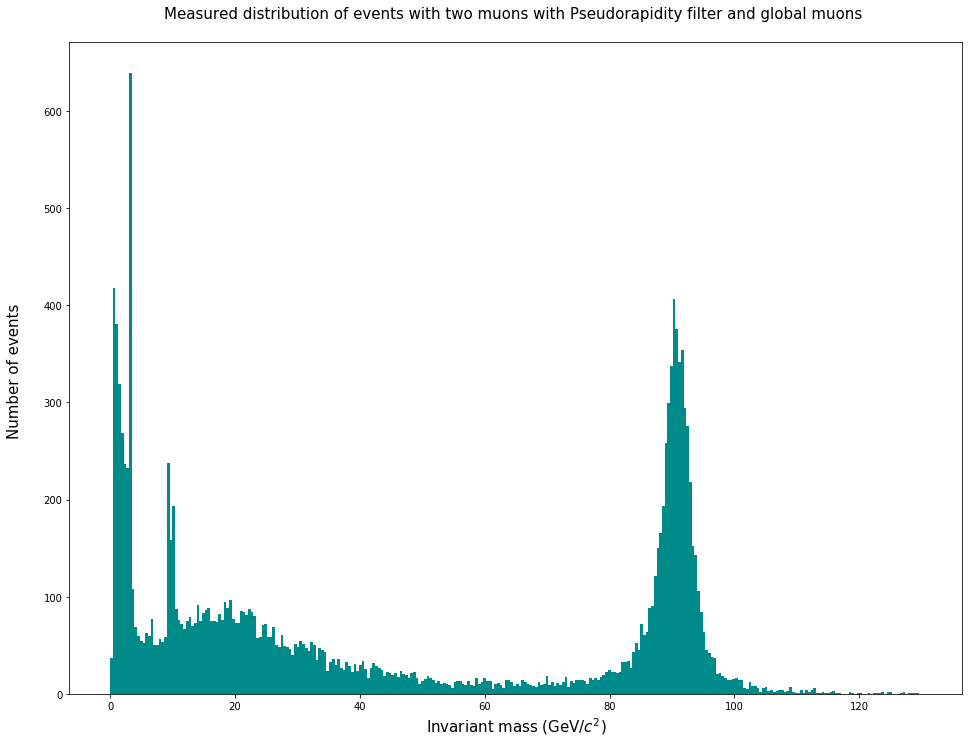

In [23]:
GO2 = df[(C1 | C2) & (C3 | C4 | C7) & (C5 & C6)]

fig = plt.figure(figsize=(16, 12))

plt.hist(GO2 .MassInvariant, 300, range = (0,130), color = 'darkcyan')

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons with Pseudorapidity filter and global muons \n', fontsize = 15)

plt.show()

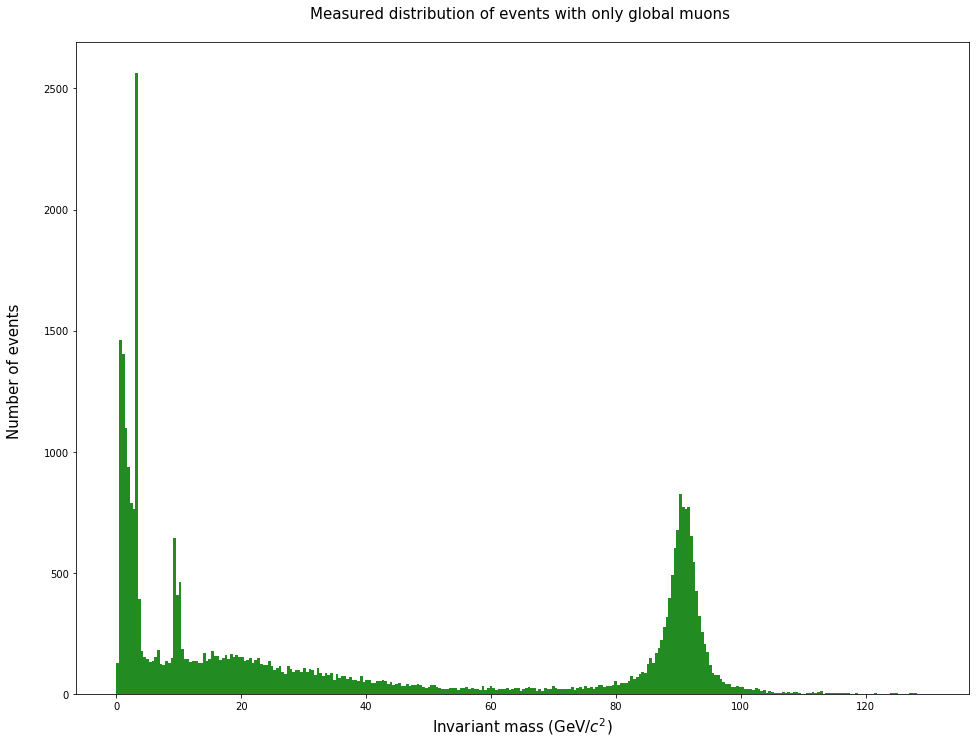

In [24]:
GO3 = df[C5 & C6]

fig = plt.figure(figsize=(16, 12))

plt.hist(GO3 .MassInvariant, 300, range = (0,130), color = 'forestgreen')

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with only global muons \n', fontsize = 15)

plt.show()

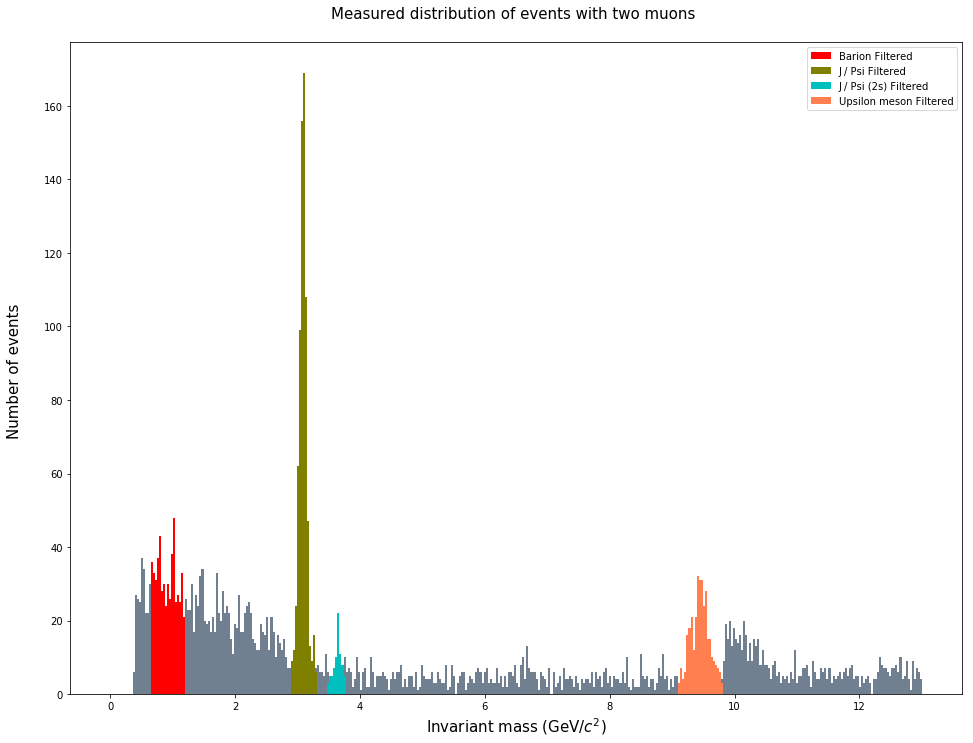

In [25]:
Lowmass = df[(df.MassInvariant >= 0) & (df.MassInvariant <= 13) & (C1 | C2) & (C3 | C4 | C7) & (C5 & C6)] 
BarionF = df[(df.MassInvariant >= 0.65) & (df.MassInvariant <= 1.2) & (C1 | C2) & (C3 | C4 | C7) & (C5 & C6)]

JpsiF = df[(df.MassInvariant >= 2.9) & (df.MassInvariant <= 3.3) & (C1 | C2) & (C3 | C4 | C7) & (C5 & C6)]
Jpsi2F = df[(df.MassInvariant >= 3.5) & (df.MassInvariant <= 3.75) & (C1 | C2) & (C3 | C4 | C7) & (C5 & C6)]
UpsilonmesonF = df[(df.MassInvariant >= 9.1) & (df.MassInvariant <= 9.8) & (C1 | C2) & (C3 | C4 | C7) & (C5 & C6)]

fig = plt.figure(figsize=(16, 12))

plt.hist(Lowmass .MassInvariant, 400, range = (0,13), color = 'slategray')
plt.hist(BarionF .MassInvariant, 400, range = (0,13), label = 'Barion Filtered',  color = 'red')

plt.hist(JpsiF .MassInvariant, 400, range = (0,13), label = 'J / Psi Filtered', color = 'olive')
plt.hist(Jpsi2F .MassInvariant, 400, range = (0,13), label = 'J / Psi (2s) Filtered', color = 'c')
plt.hist(UpsilonmesonF .MassInvariant, 400, range = (0,13), label = 'Upsilon meson Filtered', color = 'coral')

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)
plt.legend()
plt.show()

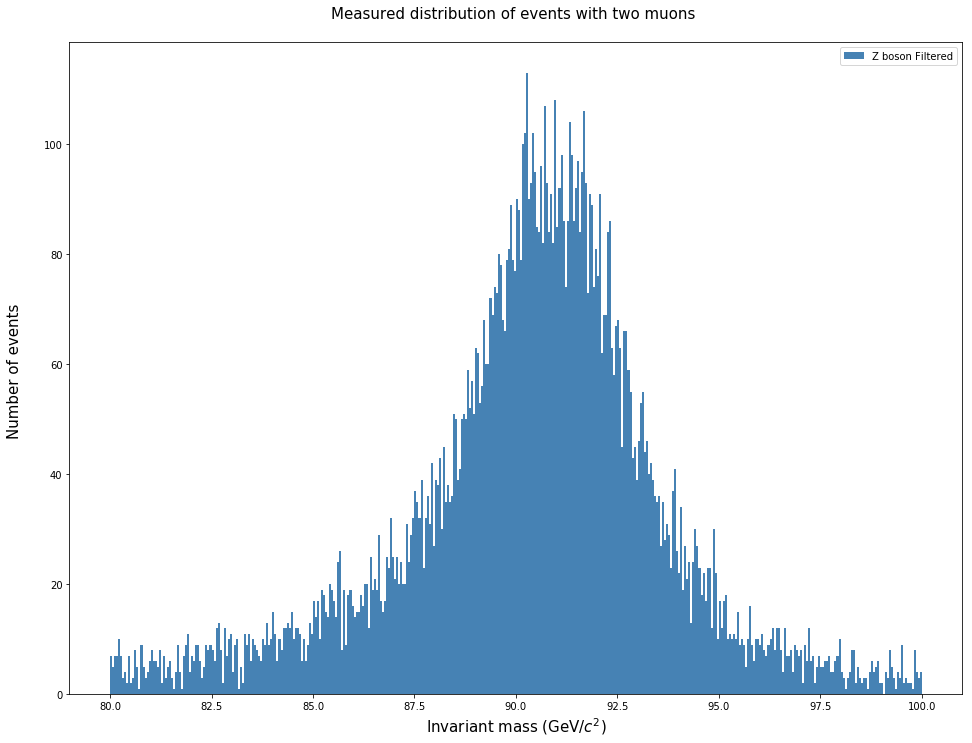

In [26]:
ZF = df[(df.MassInvariant >= 80) & (df.MassInvariant <= 100)] 

fig = plt.figure(figsize=(16, 12))

plt.hist(Z .MassInvariant, 400, range = (80,100), label = 'Z boson Filtered',  color = 'steelblue')

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)
plt.legend()
plt.show()